In [4]:
import pandas as pd
#df_wine=pd.read_csv('/home/dcabrerar/PML/Capitulo5/wine.data', header=None)
#df_wine=pd.read_csv('C:\Deivy\Phyton\REPOS\Python-Machine-Learning\Python-Machine-Learning\Capitulo5', header=None)
df_wine=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
print(df_wine)

     0      1     2     3     4    5     6     7     8     9      10    11  \
0     1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.64  1.04   
1     1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
2     1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
3     1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
4     1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
..   ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
173   3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
174   3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
175   3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
176   3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
177   3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

       12    13  
0    3.92  1065  
1    3.40  1050  
2    3.17

In [5]:
from sklearn.model_selection import train_test_split
X,y=df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test=\
    train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)
#estandarizar las caracteristicas
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [6]:
import numpy as np
cov_mat=np.cov(X_train_std.T)
eigen_vals,eigen_vecs=np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


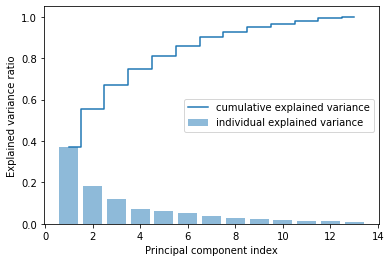

In [7]:
tot=sum(eigen_vals)
var_exp=[(i/tot) for i in sorted(eigen_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,14),var_exp,alpha=0.5,align='center',label='individual explained variance')
plt.step(range(1,14),cum_var_exp,where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [8]:
#Hacer una lista de las tuplas (autovalor,autovector)
eigen_pairs=[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
#Ordenar las tuplas (autovalor,autovector) de mayor a menor
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [9]:
w=np.hstack((eigen_pairs[0][1][:,np.newaxis],eigen_pairs[1][1][:,np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [10]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [11]:
X_train_pca=X_train_std.dot(w)

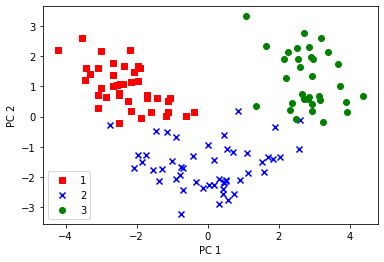

In [12]:
colors=['r','b','g']
markers=['s','x','o']
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train==l,0],
                X_train_pca[y_train==l,1],
                c=c,label=l,marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
<ipython-input-13-a251f4a1a4fc>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will 

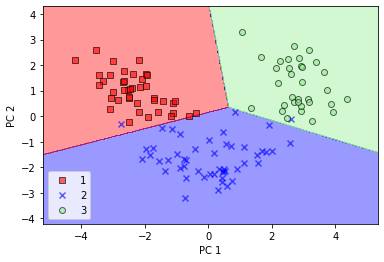

In [13]:
from matplotlib.colors import ListedColormap
def plot_decisions_regions(X,y,classifier,resolution=0.02):
    #Configurar generador de marcadores y mapa de colores
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    #Representar la superficie de decisión
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                        np.arange(x2_min,x2_max,resolution))
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    #Representar las muestras de clases
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                    alpha=0.6,
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
lr=LogisticRegression()
X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_std)
lr.fit(X_train_pca,y_train)
plot_decisions_regions(X_train_pca,y_train,classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
<ipython-input-13-a251f4a1a4fc>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will 

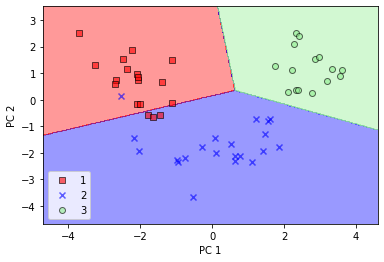

In [14]:
plot_decisions_regions(X_test_pca,y_test,classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [15]:
pca=PCA(n_components=None)
X_train_pca=pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [17]:
np.set_printoptions(precision=4)
mean_vecs=[]
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label],axis=0))
    print('MV %s: %s\n' %(label,mean_vecs[label-1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [18]:
d=13 #numero de caracteristicas
S_W=np.zeros((d,d))
for label, mv in zip(range(1,4),mean_vecs):
    class_scatter=np.zeros((d,d))
    for row in X_train_std[y_train==label]:
        row,mv=row.reshape(d,1),mv.reshape(d,1)
        class_scatter+=(row-mv).dot((row-mv).T)
    S_W+=class_scatter
print('Within-class scatter matrix: %sx%s' %(S_W.shape[0],S_W.shape[1]))

Within-class scatter magtrix: 13x13


In [20]:
print('Class label distribution: %s' % np.bincount(y_train)[1:])

Class label distribution: [41 50 33]


In [21]:
d=13 #numero de caracteristicas
S_W=np.zeros((d,d))
for label,mv in zip(range(1,4),mean_vecs):
    class_scatter=np.cov((X_train_std[y_train==label].T))
    S_W+=class_scatter
print('Within-class scatter matrix: %sx%s' %(S_W.shape[0],S_W.shape[1]))

Within-class scatter magtrix: 13x13


In [22]:
mean_overall=np.mean(X_train_std,axis=0)
d=13 #numero de caracteristicas
S_B=np.zeros((d,d))
for i, mean_vec in enumerate(mean_vecs):
    n=X_train[y_train==i+1,:].shape[0]
    mean_vec=mean_vec.reshape(d,1) #make column vector
    mean_overall=mean_overall.reshape(d,1)
    S_B+=n*(mean_vec-mean_overall).dot((mean_vec-mean_overall).T)
print('Between-class scatter matrix: %sx%s' %(S_B.shape[0],S_B.shape[1]))

Between-class scatter matrix: 13x13


In [23]:
eigen_vals,eigen_vecs=np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [24]:
eigen_pairs=[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs=sorted(eigen_pairs,key=lambda k:k[0],reverse=True)
print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

349.6178089059939
172.76152218979385
4.6138298979609615e-14
2.842170943040401e-14
2.1547547231576004e-14
2.1547547231576004e-14
2.1321463669527416e-14
2.1321463669527416e-14
1.4639876994554242e-14
9.87835891156858e-15
6.9209749419683555e-15
6.9209749419683555e-15
3.795292302943713e-15


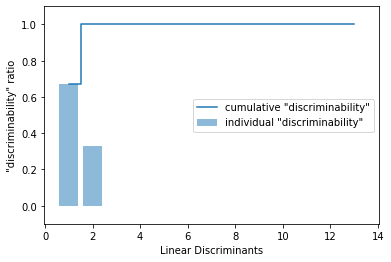

In [25]:
tot=sum(eigen_vals.real)
discr=[(i/tot) for i in sorted(eigen_vals.real,reverse=True)]
cum_discr=np.cumsum(discr)
plt.bar(range(1,14),discr,alpha=0.5,align='center',label='individual "discriminability"')
plt.step(range(1,14),cum_discr,where='mid',label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1,1.1])
plt.legend(loc='best')
plt.show()

In [31]:
w=np.hstack((eigen_pairs[0][1][:,np.newaxis].real,
             eigen_pairs[1][1][:,np.newaxis].real))
print('Matrix W:\n',w)

Matrix W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


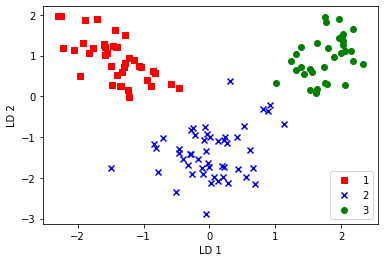

In [36]:
X_train_lda=X_train_std.dot(w)
colors=['r','b','g']
markers=['s','x','o']
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_lda[y_train==l,0],
                X_train_lda[y_train==l,1]*(-1),
                c=c,label=l,marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.show()

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=2)
X_train_lda=lda.fit_transform(X_train_std,y_train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
<ipython-input-13-a251f4a1a4fc>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will 

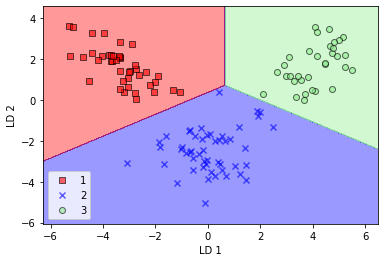

In [38]:
lr=LogisticRegression()
lr=lr.fit(X_train_lda,y_train)
plot_decisions_regions(X_train_lda,y_train,classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
<ipython-input-13-a251f4a1a4fc>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will 

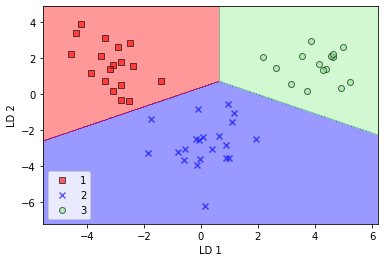

In [39]:
X_test_lda=lda.transform(X_test_std)
plot_decisions_regions(X_test_lda,y_test,classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

In [48]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np
def rbf_kernel_pca(X,gamma,n_components):
    #calcular pares de distancias euclidianas al cuadrado
    #en el conjunto de datos MxN
    sq_dists=pdist(X,'sqeuclidean')
    
    #convertir los pares de distancias en una matriz cuadrada
    mat_sq_dists=squareform(sq_dists)
    
    #Calcular la matriz de kernel simetrica
    K=exp(-gamma*mat_sq_dists)
    
    #centrar la matriz de kernel
    N=K.shape[0]
    one_n=np.ones((N,N))/N
    K=K-one_n.dot(K)-K.dot(one_n)+one_n.dot(K).dot(one_n)
    
    #Obtener autopartes a partir de la matriz de kernel centrada
    #scipy.linalg.eigh los devuelve en orden ascendente
    eigvals, eigvecs=eigh(K)
    eigvals, eigvecs=eigvals[::-1],eigvecs[:,::-1]
    
    #recoger los primeros autovectores k (muestras proyectadas)
    X_pc=np.column_stack((eigvecs[:,i] for i in range(n_components)))
    return X_pc

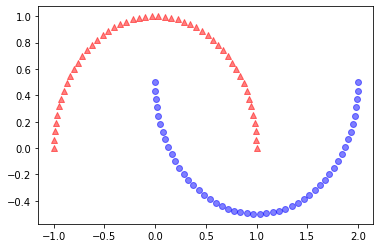

In [49]:
from sklearn.datasets import make_moons
X, y =make_moons(n_samples=100,random_state=123)
plt.scatter(X[y==0,0],X[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],color='blue',marker='o',alpha=0.5)
plt.show()

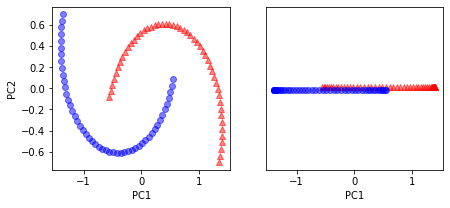

In [50]:
from sklearn.decomposition import PCA
scikit_pca=PCA(n_components=2)
X_spca=scikit_pca.fit_transform(X)
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_spca[y==0,0],X_spca[y==0,1],color='red',marker='^',alpha=0.5)
ax[0].scatter(X_spca[y==1,0],X_spca[y==1,1],color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_spca[y==0,0],np.zeros((50,1))+0.02,color='red',marker='^',alpha=0.5)
ax[1].scatter(X_spca[y==1,0],np.zeros((50,1))-0.02,color='blue',marker='o',alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

<ipython-input-48-9beecd3a41b2>:14: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K=exp(-gamma*mat_sq_dists)
<ipython-input-48-9beecd3a41b2>:27: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X_pc=np.column_stack((eigvecs[:,i] for i in range(n_components)))


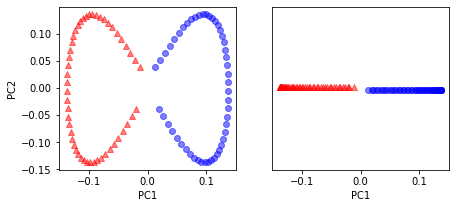

In [51]:
X_kpca=rbf_kernel_pca(X,gamma=15,n_components=2)
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],color='red',marker='^',alpha=0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_kpca[y==0,0],np.zeros((50,1))+0.02,color='red',marker='^',alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((50,1))-0.02,color='blue',marker='o',alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

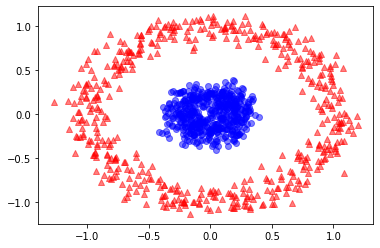

In [52]:
from sklearn.datasets import make_circles
X, y =make_circles(n_samples=1000,random_state=123,noise=0.1,factor=0.2)
plt.scatter(X[y==0,0],X[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],color='blue',marker='o',alpha=0.5)
plt.show()

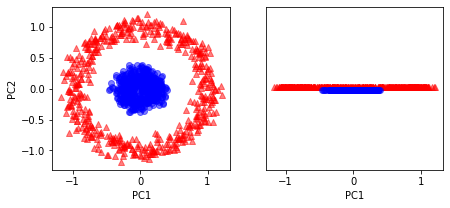

In [54]:
scikit_pca=PCA(n_components=2)
X_spca=scikit_pca.fit_transform(X)
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_spca[y==0,0],X_spca[y==0,1],color='red',marker='^',alpha=0.5)
ax[0].scatter(X_spca[y==1,0],X_spca[y==1,1],color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_spca[y==0,0],np.zeros((500,1))+0.02,color='red',marker='^',alpha=0.5)
ax[1].scatter(X_spca[y==1,0],np.zeros((500,1))-0.02,color='blue',marker='o',alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

<ipython-input-48-9beecd3a41b2>:14: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K=exp(-gamma*mat_sq_dists)
<ipython-input-48-9beecd3a41b2>:27: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X_pc=np.column_stack((eigvecs[:,i] for i in range(n_components)))


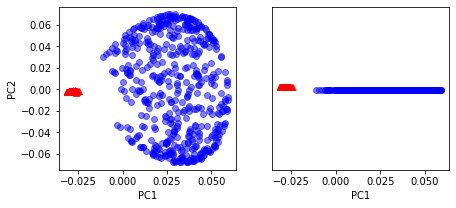

In [55]:
X_kpca=rbf_kernel_pca(X,gamma=15,n_components=2)
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],color='red',marker='^',alpha=0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_kpca[y==0,0],np.zeros((500,1))+0.02,color='red',marker='^',alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((500,1))-0.02,color='blue',marker='o',alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()